In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import lime
import lime.lime_tabular
# plt.style.use()

In [22]:
df = pd.read_csv("../datasets/09-12-2021_20-48-36.csv")
print(len(df))
df

540364


,Unnamed: 0,hour,minute,second,relative_time,temperature,mean_temp_day,heatindex,relative_humidity,light_sensor_one_wavelength,light_sensor_two_wavelength,number_occupants,activity_occupants,door_state,window_state,target,room_A,room_B,room_C
0,486159,10,59,50,572,22.10,3.1,21.453399,37.472,197.14,588.8,1,4,0,0,0,0,0,1
1,498156,16,3,36,2795,22.27,3.1,21.690846,41.117,175.71,437.0,0,0,0,0,0,0,0,1
2,257373,9,30,19,1484,21.42,10.4,21.334467,55.737,205.71,708.4,0,0,1,0,1,1,0,0
3,380814,14,22,26,6435,23.25,9.5,22.461804,41.603,184.29,414.0,0,0,0,0,0,0,1,0
4,188312,11,31,54,3339,23.24,13.0,23.010511,56.993,255.71,1062.6,2,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540359,32394,11,29,56,236,20.97,6.0,20.947466,46.949,270.00,1099.4,0,0,0,0,0,1,0,0
540360,237009,10,30,2,422,20.75,9.8,20.847739,51.688,188.57,529.0,0,0,1,0,0,1,0,0
540361,4623,10,4,26,4619,21.08,4.0,20.972212,44.236,182.86,556.6,2,1,0,0,0,1,0,0
540362,125539,10,27,5,5019,21.15,8.1,21.077712,48.083,250.00,864.8,2,1,0,0,1,1,0,0


In [7]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('../datasets/09-12-2021_20-48-36.csv', sep=',', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.9985074626865671
exported_pipeline = make_pipeline(
    VarianceThreshold(threshold=0.005),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features=0.45, min_samples_leaf=5, min_samples_split=18, n_estimators=100, subsample=0.9000000000000001)
)
exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [30]:
results

array([0., 0., 1., ..., 0., 0., 0.])

In [41]:
def prob(data):
    return np.array(list(zip(1-exported_pipeline.predict(data),exported_pipeline.predict(data))))

In [42]:
explainer = lime.lime_tabular.LimeTabularExplainer(features.astype(float).values,
                                                    mode='classification',training_labels=df['target'],feature_names=features.columns)


In [34]:
df.astype(float).values.shape

(540364, 19)

In [46]:
exp = explainer.explain_instance(features.iloc[1], exported_pipeline.predict_proba)

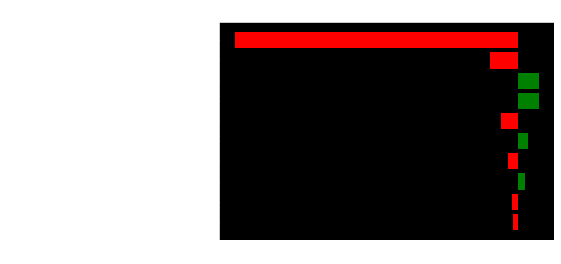

In [54]:
%matplotlib inline
fig = exp.as_pyplot_figure()
exp.save_to_file('./tmp/oi.html')

In [47]:
for col in features.columns:
    print(col)

Unnamed: 0
hour
minute
second
relative_time
temperature
mean_temp_day
heatindex
relative_humidity
light_sensor_one_wavelength
light_sensor_two_wavelength
number_occupants
activity_occupants
door_state
window_state
room_A
room_B
room_C
